## Problem Statement:
To build a CNN model which can identify various dance form images and label their classes out of 8.
## Steps:
1. Importing libraries
2. Loading Data
3. Create Directories and Sub directories
4. Splitting Training and Validation set
5. Define Model
    * Loading Pretrained Model
    * Freeze/Lock layers at end
    * Add new layer to get required number of output    
6. Data Augmentation
7. Training Model
8. Prediction

## Import Required Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import random
from shutil import copyfile

from keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Loading data

In [3]:
train_dir = 'C:\Users\Anshul\Desktop\Data Science\HackerEarth\Identify Dance Form Challenge\train'
test_dir = 'C:\Users\Anshul\Desktop\Data Science\HackerEarth\Identify Dance Form Challenge\test'
train_csv = pd.read_csv('C:\Users\Anshul\Desktop\Data Science\HackerEarth\Identify Dance Form Challenge\train.csv')
test_csv = pd.read_csv('C:\Users\Anshul\Desktop\Data Science\HackerEarth\Identify Dance Form Challenge\test.csv')

In [4]:
train_csv.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


## Create directories and sub-directories
1. Directories and sub-directories are created to store images. Training directory is created to store training images      and it contains 8 sub-directories based on the names of various dance forms. Same thing is done for validation directory and sub-directories
2. Source directory containing sub-directories has been created to store all the images at the initial step and then the images are splitted to training and validation directories repectively. Test directory has been created for the final prediction of images after the model is trained already. 

In [5]:
os.mkdir('/kaggle/working/identify-dance-form/')
os.mkdir('/kaggle/working/identify-dance-form/training/')
os.mkdir('/kaggle/working/identify-dance-form/testing/')
os.mkdir(r'/kaggle/working/identify-dance-form/source')
os.mkdir(r'/kaggle/working/identify-dance-form/training/manipuri')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/manipuri')
os.mkdir(r'/kaggle/working/identify-dance-form/source/manipuri')
os.mkdir(r'/kaggle/working/identify-dance-form/training/bharatanatyam')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/bharatanatyam')
os.mkdir(r'/kaggle/working/identify-dance-form/source/bharatanatyam')
os.mkdir(r'/kaggle/working/identify-dance-form/training/odissi')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/odissi')
os.mkdir(r'/kaggle/working/identify-dance-form/source/odissi')
os.mkdir(r'/kaggle/working/identify-dance-form/training/kathakali')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/kathakali')
os.mkdir(r'/kaggle/working/identify-dance-form/source/kathakali')
os.mkdir(r'/kaggle/working/identify-dance-form/training/kathak')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/kathak')
os.mkdir(r'/kaggle/working/identify-dance-form/source/kathak')
os.mkdir(r'/kaggle/working/identify-dance-form/training/sattriya')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/sattriya')
os.mkdir(r'/kaggle/working/identify-dance-form/source/sattriya')
os.mkdir(r'/kaggle/working/identify-dance-form/training/kuchipudi')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/kuchipudi')
os.mkdir(r'/kaggle/working/identify-dance-form/source/kuchipudi')
os.mkdir(r'/kaggle/working/identify-dance-form/training/mohiniyattam')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/mohiniyattam')
os.mkdir(r'/kaggle/working/identify-dance-form/source/mohiniyattam')
os.mkdir('/kaggle/working/identify-dance-form/tests')
os.mkdir('/kaggle/working/identify-dance-form/tests/unknown')

## Extracting file names
Files names from train_csv are extracted out and saved in a variable in the form of list

In [6]:
files = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if '.jpg' in file:
            files.append(file)

In [7]:
print('Total images in train csv: ',len(files))
print(files)

Total images in train csv:  364
['234.jpg', '287.jpg', '87.jpg', '404.jpg', '167.jpg', '257.jpg', '163.jpg', '148.jpg', '251.jpg', '184.jpg', '99.jpg', '433.jpg', '90.jpg', '475.jpg', '76.jpg', '468.jpg', '73.jpg', '501.jpg', '379.jpg', '310.jpg', '212.jpg', '418.jpg', '106.jpg', '428.jpg', '42.jpg', '111.jpg', '371.jpg', '142.jpg', '341.jpg', '49.jpg', '478.jpg', '319.jpg', '227.jpg', '236.jpg', '75.jpg', '512.jpg', '156.jpg', '502.jpg', '387.jpg', '140.jpg', '199.jpg', '26.jpg', '494.jpg', '122.jpg', '155.jpg', '415.jpg', '69.jpg', '197.jpg', '124.jpg', '436.jpg', '240.jpg', '434.jpg', '109.jpg', '515.jpg', '164.jpg', '351.jpg', '107.jpg', '263.jpg', '519.jpg', '427.jpg', '91.jpg', '370.jpg', '126.jpg', '135.jpg', '247.jpg', '325.jpg', '504.jpg', '83.jpg', '168.jpg', '230.jpg', '101.jpg', '397.jpg', '12.jpg', '213.jpg', '154.jpg', '185.jpg', '331.jpg', '445.jpg', '353.jpg', '393.jpg', '177.jpg', '115.jpg', '361.jpg', '451.jpg', '43.jpg', '2.jpg', '139.jpg', '496.jpg', '181.jpg', '85.

## Let's plot an image from  training data

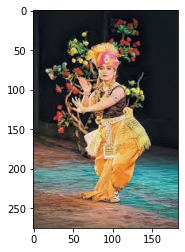

In [8]:
#Using matplotlib's imperative-style plotting interface
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(train_dir, files[10])))

### Copying images from train directory to the source sub-directories according to their labels

In [9]:

for x in files:
    if (train_csv[train_csv['Image'] == x]['target'] == 'odissi').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/odissi/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'manipuri').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/manipuri/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'bharatanatyam').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/bharatanatyam/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kathakali').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/kathakali/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kathak').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/kathak/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'sattriya').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/sattriya/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kuchipudi').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/kuchipudi/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'mohiniyattam').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/mohiniyattam/',x)
        copyfile(train_temp, final_train)

### Helper Function to split source directory images to training and validation directories

In [10]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    shuffle=random.sample(os.listdir(SOURCE),len(os.listdir(SOURCE)))
    train_data_length=int(len(os.listdir(SOURCE))*SPLIT_SIZE)
    test_data_length=int(len(os.listdir(SOURCE))-train_data_length)
    train_data=shuffle[0:train_data_length]
    test_data=shuffle[-test_data_length:]
    for x in train_data:
        train_temp=os.path.join(SOURCE,x)
        final_train=os.path.join(TRAINING,x)
        copyfile(train_temp,final_train)
    for x in test_data:
        test_temp=os.path.join(SOURCE,x)
        final_test=os.path.join(TESTING,x)
        copyfile(test_temp,final_test)

In [11]:
# Assigning variables to vaious directries

bhatanatyam_source_dir = '/kaggle/working/identify-dance-form/source/bharatanatyam/'
bhatanatyam_training_dir = '/kaggle/working/identify-dance-form/training/bharatanatyam/'
bhatanatyam_testing_dir = '/kaggle/working/identify-dance-form/testing/bharatanatyam/'

kathak_source_dir = '/kaggle/working/identify-dance-form/source/kathak/'
kathak_training_dir = '/kaggle/working/identify-dance-form/training/kathak/'
kathak_testing_dir = '/kaggle/working/identify-dance-form/testing/kathak/'

kathakali_source_dir = '/kaggle/working/identify-dance-form/source/kathakali/'
kathakali_training_dir = '/kaggle/working/identify-dance-form/training/kathakali/'
kathakali_testing_dir = '/kaggle/working/identify-dance-form/testing/kathakali/'

kuchipudi_source_dir = '/kaggle/working/identify-dance-form/source/kuchipudi/'
kuchipudi_training_dir = '/kaggle/working/identify-dance-form/training/kuchipudi/'
kuchipudi_testing_dir = '/kaggle/working/identify-dance-form/testing/kuchipudi/'

manipuri_source_dir = '/kaggle/working/identify-dance-form/source/manipuri/'
manipuri_training_dir = '/kaggle/working/identify-dance-form/training/manipuri/'
manipuri_testing_dir = '/kaggle/working/identify-dance-form/testing/manipuri/'

mohiniyattam_source_dir = '/kaggle/working/identify-dance-form/source/mohiniyattam/'
mohiniyattam_training_dir = '/kaggle/working/identify-dance-form/training/mohiniyattam/'
mohiniyattam_testing_dir = '/kaggle/working/identify-dance-form/testing/mohiniyattam/'

odissi_source_dir = '/kaggle/working/identify-dance-form/source/odissi/'
odissi_training_dir = '/kaggle/working/identify-dance-form/training/odissi/'
odissi_testing_dir = '/kaggle/working/identify-dance-form/testing/odissi/'

sattriya_source_dir = '/kaggle/working/identify-dance-form/source/sattriya/'
sattriya_training_dir = '/kaggle/working/identify-dance-form/training/sattriya/'
sattriya_testing_dir = '/kaggle/working/identify-dance-form/testing/sattriya/'

### Splitting the Source Diretory images into training and validation sub directories

In [12]:
split_size = 0.85
split_data(bhatanatyam_source_dir, bhatanatyam_training_dir, bhatanatyam_testing_dir, split_size)
split_data(sattriya_source_dir, sattriya_training_dir, sattriya_testing_dir, split_size)
split_data(odissi_source_dir, odissi_training_dir, odissi_testing_dir, split_size)
split_data(mohiniyattam_source_dir, mohiniyattam_training_dir, mohiniyattam_testing_dir, split_size)
split_data(manipuri_source_dir, manipuri_training_dir, manipuri_testing_dir, split_size)
split_data(kuchipudi_source_dir, kuchipudi_training_dir, kuchipudi_testing_dir, split_size)
split_data(kathakali_source_dir, kathakali_training_dir, kathakali_testing_dir, split_size)
split_data(kathak_source_dir, kathak_training_dir, kathak_testing_dir, split_size)

## Define Model(Transfer Learning)

VGG-19 is a convolutional neural network which is 19 layers deep. It's pretrained version of the network has trained on more than a million images from the ImageNet database. This network is trained on images with an input size of 224-by-224. By adding few more layers to this pretrained model, we can use it for classification of the various dance forms. As, pretrained model has already extracted out the edges and important features from millions of images, so it can classify images with much higher accuracy.

In [13]:
from keras.applications.vgg19 import VGG19

In [14]:
# Initializing pretrained model
image_size = [224, 224]

pretrained_model = VGG19(input_shape=image_size + [3], weights = 'imagenet', include_top = False)

80142336/80134624 [==============================] - 2s 0us/step


In [15]:
pretrained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
len(pretrained_model.layers)

22

### Freeze/lock some of the layers at the end.

In [45]:
freeze_layers = 21
for layer in pretrained_model.layers[:freeze_layers]:
    layer.trainable=False

As per the objective of identifying the dance forms from the images, few layers are added to get 8 outputs using softmax activation function.

In [46]:
x = Flatten()(pretrained_model.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.40)(x)
x = Dense(8, activation = 'softmax')(x)
model = Model(inputs=pretrained_model.input, outputs = x)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## Data Augmentation
1. Image Data Generator changes the differnt size images to the input size.
2. Normalize images while loading them.
3. Create augmented images in the memory.
4. Label them based on their directory names

In [47]:
TRAINING_DIR = '/kaggle/working/identify-dance-form/training/'
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  rotation_range =20,
                                  width_shift_range=0.3,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(224,224),
                                                   color_mode='rgb',
                                                   batch_size=8,
                                                   class_mode='categorical')

VALIDATION_DIR = '/kaggle/working/identify-dance-form/testing/'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(224,224),
                                                             color_mode='rgb',
                                                             batch_size=8,
                                                             class_mode='categorical')

Found 305 images belonging to 8 classes.
Found 59 images belonging to 8 classes.


In [48]:
# Set optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Set a Learning Rate Annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [50]:
# Training model
history = model.fit_generator(train_generator,
                              epochs=40,
                              verbose=2,
                              validation_data=validation_generator,
                              callbacks= [learning_rate_reduction])

Epoch 1/40
 - 9s - loss: 16.6774 - accuracy: 0.1607 - val_loss: 4.8005 - val_accuracy: 0.2373
Epoch 2/40
 - 9s - loss: 4.3853 - accuracy: 0.2131 - val_loss: 0.6530 - val_accuracy: 0.2712
Epoch 3/40
 - 8s - loss: 2.3032 - accuracy: 0.2721 - val_loss: 2.1089 - val_accuracy: 0.2203
Epoch 4/40
 - 8s - loss: 2.0363 - accuracy: 0.3115 - val_loss: 1.6634 - val_accuracy: 0.4746
Epoch 5/40
 - 8s - loss: 1.9849 - accuracy: 0.2918 - val_loss: 2.4358 - val_accuracy: 0.4407
Epoch 6/40
 - 8s - loss: 1.9198 - accuracy: 0.3180 - val_loss: 2.9032 - val_accuracy: 0.3559
Epoch 7/40
 - 8s - loss: 1.8855 - accuracy: 0.3279 - val_loss: 1.4546 - val_accuracy: 0.4407

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/40
 - 9s - loss: 1.5665 - accuracy: 0.4361 - val_loss: 0.4942 - val_accuracy: 0.4746
Epoch 9/40
 - 9s - loss: 1.4491 - accuracy: 0.4361 - val_loss: 1.0204 - val_accuracy: 0.5085
Epoch 10/40
 - 8s - loss: 1.4637 - accuracy: 0.4689 - val_loss: 1.8081 - val_accu

### Plot Training & Validation Accuracy

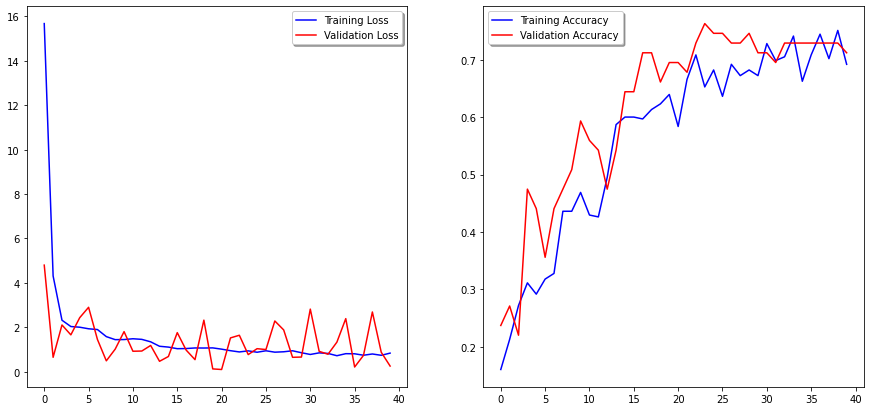

In [51]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

### Predicting the test images labels and preparing submission file

In [52]:
test_files = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if '.jpg' in file:
            test_files.append(file)

In [53]:
print(test_files)

['170.jpg', '438.jpg', '458.jpg', '510.jpg', '138.jpg', '238.jpg', '38.jpg', '479.jpg', '264.jpg', '278.jpg', '424.jpg', '97.jpg', '506.jpg', '441.jpg', '48.jpg', '390.jpg', '64.jpg', '112.jpg', '485.jpg', '414.jpg', '495.jpg', '292.jpg', '183.jpg', '463.jpg', '13.jpg', '461.jpg', '146.jpg', '132.jpg', '392.jpg', '217.jpg', '71.jpg', '324.jpg', '346.jpg', '150.jpg', '216.jpg', '206.jpg', '59.jpg', '110.jpg', '92.jpg', '33.jpg', '196.jpg', '128.jpg', '447.jpg', '175.jpg', '518.jpg', '286.jpg', '95.jpg', '198.jpg', '401.jpg', '61.jpg', '507.jpg', '340.jpg', '239.jpg', '125.jpg', '246.jpg', '514.jpg', '129.jpg', '271.jpg', '374.jpg', '283.jpg', '40.jpg', '162.jpg', '517.jpg', '275.jpg', '67.jpg', '284.jpg', '366.jpg', '465.jpg', '318.jpg', '226.jpg', '360.jpg', '429.jpg', '108.jpg', '317.jpg', '9.jpg', '354.jpg', '290.jpg', '34.jpg', '358.jpg', '147.jpg', '45.jpg', '332.jpg', '11.jpg', '431.jpg', '224.jpg', '375.jpg', '421.jpg', '20.jpg', '152.jpg', '394.jpg', '456.jpg', '302.jpg', '410.j

## Plotting test image

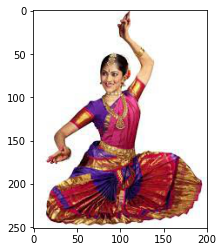

In [54]:
plt.imshow(mpimg.imread(os.path.join(test_dir,test_files[0])))

### Copying images from test input data to unknown subdirectory inside test directory
As the labels of test images are not known to us, so storing them in a subdirectory names as "unknown"

In [55]:
for x in test_files:
    test_temp = os.path.join(test_dir, x)
    final_test = os.path.join('/kaggle/working/identify-dance-form/tests/unknown/', x)
    copyfile(test_temp, final_test)

In [56]:
test_dir = '/kaggle/working/identify-dance-form/tests'
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(224, 224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode=None,
                                                 shuffle=False,
                                                 seed=42)

Found 156 images belonging to 1 classes.


#### Saving test images in a list

In [57]:
img_list = []
for x in test_generator.filenames:
    x = x.split('/')[1]
    img_list.append(x)

In [58]:
print(img_list)

['108.jpg', '11.jpg', '110.jpg', '112.jpg', '114.jpg', '119.jpg', '125.jpg', '128.jpg', '129.jpg', '13.jpg', '132.jpg', '138.jpg', '14.jpg', '145.jpg', '146.jpg', '147.jpg', '150.jpg', '152.jpg', '157.jpg', '162.jpg', '17.jpg', '170.jpg', '171.jpg', '173.jpg', '175.jpg', '183.jpg', '189.jpg', '193.jpg', '194.jpg', '196.jpg', '198.jpg', '20.jpg', '200.jpg', '202.jpg', '206.jpg', '210.jpg', '215.jpg', '216.jpg', '217.jpg', '220.jpg', '224.jpg', '226.jpg', '23.jpg', '232.jpg', '238.jpg', '239.jpg', '246.jpg', '256.jpg', '264.jpg', '269.jpg', '270.jpg', '271.jpg', '275.jpg', '278.jpg', '28.jpg', '280.jpg', '283.jpg', '284.jpg', '285.jpg', '286.jpg', '290.jpg', '291.jpg', '292.jpg', '301.jpg', '302.jpg', '306.jpg', '316.jpg', '317.jpg', '318.jpg', '323.jpg', '324.jpg', '33.jpg', '330.jpg', '332.jpg', '34.jpg', '340.jpg', '346.jpg', '349.jpg', '35.jpg', '354.jpg', '358.jpg', '360.jpg', '363.jpg', '366.jpg', '373.jpg', '374.jpg', '375.jpg', '378.jpg', '38.jpg', '380.jpg', '385.jpg', '386.jpg'

## Prediction of images

In [59]:
prediction = model.predict_generator(test_generator)
prediction = np.argmax(prediction, axis=1)
prediction

array([4, 1, 4, 0, 3, 0, 1, 0, 0, 3, 0, 1, 1, 6, 0, 0, 0, 1, 0, 0, 1, 0,
       3, 6, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 0, 5, 6, 0, 7, 5, 0, 5, 1, 7, 5, 0, 1, 7, 5, 5, 5, 0, 5, 1,
       7, 1, 7, 7, 7, 7, 1, 7, 1, 7, 1, 7, 3, 7, 7, 7, 6, 7, 1, 1, 3, 0,
       1, 3, 3, 3, 3, 3, 3, 1, 1, 6, 3, 5, 3, 5, 0, 3, 4, 3, 3, 1, 3, 3,
       0, 1, 6, 6, 1, 6, 6, 6, 6, 4, 6, 1, 6, 6, 3, 6, 1, 6, 6, 3, 6, 6,
       6, 5, 6, 6, 3, 3, 6, 3, 5, 6, 1, 1, 4, 1, 1, 3, 0, 4, 4, 4, 1, 4,
       4, 4])

In [60]:
train_generator.class_indices

{'bharatanatyam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

#### Creating a DataFrame with the image name and the predicted image label

In [61]:
data = {'Image': img_list, 'target': prediction}
df = pd.DataFrame(data)
df.head()

,Image,target
0,108.jpg,4
1,11.jpg,1
2,110.jpg,4
3,112.jpg,0
4,114.jpg,3


In [62]:
df['target'] = df['target'].map({0:'bharatanatyam',
                                 1:'kathak',
                                 2:'kathakali',
                                 3:'kuchipudi',
                                 4:'manipuri',
                                 5:'mohiniyattam',
                                 6:'odissi',
                                 7:'sattriya'})

In [63]:
df.head()

,Image,target
0,108.jpg,manipuri
1,11.jpg,kathak
2,110.jpg,manipuri
3,112.jpg,bharatanatyam
4,114.jpg,kuchipudi


In [64]:
# Saving csv
df.to_csv('identifydanceform_submission15.csv', index=False)